In [1]:
# Custom functions
from my_functions import *
import pickle 

## Import and clean data

In [2]:
# Wikipedia movie list
df_wiki = pd.read_csv('bk_wiki.csv', dtype=object)

# Remove any duplicates
df_wiki = df_wiki.drop_duplicates(['Title', 'Year'])

df_wiki.head(2)

,Year,Title,Worldwide Gross
0,2013,The Hunger Games: Catching Fire,"$865,011,746"
1,2014,The Hunger Games: Mockingjay – Part 1,"$755,356,711"


In [3]:
# Import Rotten Tomatoes data
df_rt = pd.concat([pd.read_csv('Rotten Tomatoes/bk_rt_1_raw.csv', dtype=object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_2_raw.csv', dtype=object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_3_raw.csv', dtype=object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_4_raw.csv', dtype=object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_5_raw.csv', dtype=object)])

# Update column names
Cols = ['review','wiki_name','wiki_year','rt_name',
        'genre','release_year','stream_year','critical_consensus','description']
df_rt.columns = Cols

# Remove any duplicates
df_rt = df_rt.drop_duplicates()

print(f'{len(df_rt)} rows of data loaded for {len(df_rt.wiki_name.unique())} films')
print(f'Therefore, {len(df_wiki) - len(df_rt.wiki_name.unique())} films were not found by the WebCrawler')
df_rt.head(2)

6756 rows of data loaded for 395 films
Therefore, 110 films were not found by the WebCrawler


,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
0,"It's mainstream entertainment, but it succeeds...",The Hunger Games: Catching Fire,2013,The Hunger Games: Catching Fire - Movie Reviews,"Adventure , Sci-Fi , Action",2013,2016,"Smart, smoothly directed, and enriched with a ...",After arriving safely home from their unpreced...
1,"Vivid, visceral filmmaking, twisty and enterta...",The Hunger Games: Catching Fire,2013,The Hunger Games: Catching Fire - Movie Reviews,"Adventure , Sci-Fi , Action",2013,2016,"Smart, smoothly directed, and enriched with a ...",After arriving safely home from their unpreced...


In [4]:
# Remove Rotten Tomato records without reviews
df_rt_clean = df_rt.loc[~((df_rt['review'] == 'no reviews found')
                          | (df_rt['review'] == 'misc error')
                          | (df_rt['review'] == '')),:].dropna()
print(f'{len(df_rt) - len(df_rt_clean)} rows of removed')

131 rows of removed


In [5]:
# This film has no release year and stream year doesn't align to year from the Box Office Mojo data.
df_rt_clean[df_rt_clean.wiki_name == 'The Avengers'].head()

,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
842,Very terrible.,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
843,The movie lets [Fiennes and Thurman] down with...,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
844,"The new Avengers is dismal in dispiriting, dre...",The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
845,Some bad movies are bold outrages; many others...,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
846,"This Avengers film is so horrendously, painful...",The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...


In [6]:
# Group records into a single line per film (reviews become a list of reviews)
df_rt_clean = rev_group_list(df_rt_clean, 'review', 'wiki_name')

# Remove records where release year != mojo_year
df_rt_clean = df_rt_clean[df_rt_clean['wiki_year'] == df_rt_clean['release_year']]

# Number of reviews remaining
n = 0
for i in df_rt_clean['review']:
    for j in i: 
        n+=1

print(f'{len(df_rt_clean)} of films remaining with a total of {n} reviews')

df_rt_clean.head()

269 of films remaining with a total of 5111 reviews


,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
1712,[ ‘Here are beauties that pierce like swords o...,The Lord of the Rings: The Fellowship of the Ring,2001,The Lord of the Rings: The Fellowship of the R...,"Fantasy , Adventure",2001,2011,"Full of eye-popping special effects, and featu...",The future of civilization rests in the fate o...
933,"[""...for me to consider Captain America: Civil...",Captain America: Civil War,2016,Captain America: Civil War - Movie Reviews,"Action , Fantasy , Adventure",2016,2016,Captain America: Civil War begins the next wav...,Political pressure mounts to install a system ...
1675,"[""After all these years, I just sort of go wit...",Harry Potter and the Half-Blood Prince,2009,Harry Potter and the Half-Blood Prince - Movie...,"Fantasy , Kids & Family , Adventure",2009,2011,"Dark, thrilling, and occasionally quite funny,...",As Death Eaters wreak havoc in both Muggle and...
172,"[""All I want is your protection,"" he says to B...",The Twilight Saga: Eclipse,2010,The Twilight Saga: Eclipse - Movie Reviews,"Romance , Fantasy",2010,2014,Stuffed with characters and overly reliant on ...,Danger once again surrounds Bella (Kristen Ste...
1556,"[""Almost Christmas"" is an often disarmingly en...",Almost Christmas,2016,Almost Christmas - Movie Reviews,"Comedy , Drama , Other",2016,2017,While far from the worst holiday dramedy audie...,Walter Meyer (Danny Glover) is a retired mecha...


## Merge DataFrames

In [7]:
# Merge Wikipedia and Rotten Tomatoes data
df_merge = df_wiki.merge(df_rt_clean
                         , how='left'
                         , left_on = ['Title', 'Year']
                         , right_on = ['wiki_name', 'wiki_year'])

# Select only the columns that we will need
df_merge = df_merge.loc[:,['Title'
                          , 'Year'
                          , 'genre'
                          , 'description'
                          , 'critical_consensus'
                          , 'review']]

# Rename columns
df_merge.columns = ['title'
                    , 'year'
                    , 'genre'
                    , 'movie_description'
                    , 'review'
                    , 'critical_consensus']

# Remove any empty rows remaining
df_merge = df_merge.dropna()

print('Number of films merged: ', len(df_merge))

Number of films merged:  269


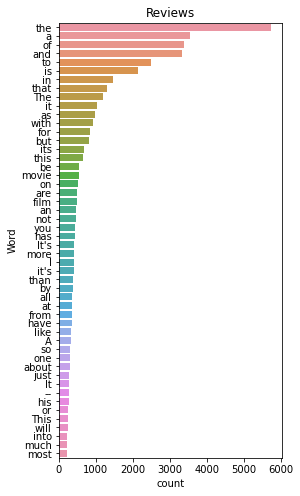

In [8]:
# Top 50 frequently used words for reviews
freq_words_chart(df_merge['review'].apply(lambda x: '| '.join(x)), 50, 'Reviews', 4)

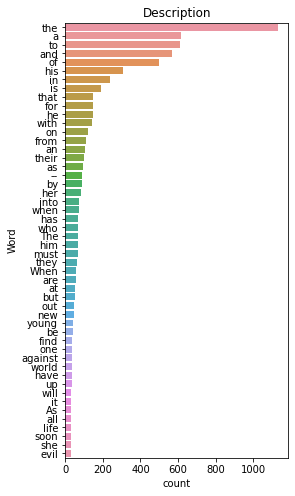

In [9]:
# Top 50 frequently used words for movie descriptions
freq_words_chart(df_merge['movie_description'], 50, 'Description', 4)

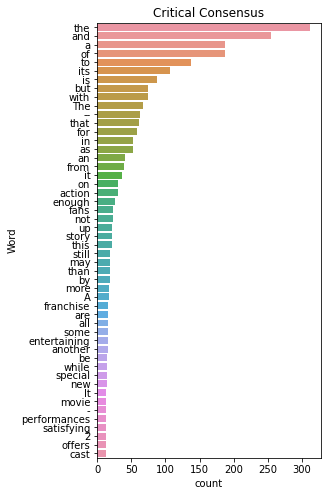

In [10]:
# Top 50 frequently used words for critical consensus
freq_words_chart(df_merge['critical_consensus'], 50, 'Critical Consensus', 4)

Text(0.5, 1.0, 'Description word count distribution')

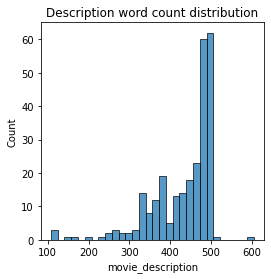

In [11]:
# Word count distribution for movie descriptions
des_len = df_merge['movie_description'].apply(lambda x: len(x))
plt.figure(figsize=(4,4))
sns.histplot(des_len, bins=30, )
plt.title('Description word count distribution')

Text(0.5, 1.0, 'Review word count distribution')

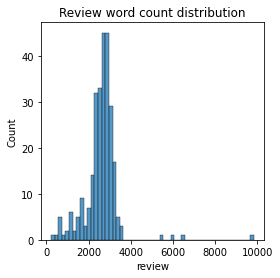

In [12]:
# Word count distribution for reviews
rev_len = df_merge['review'].apply(lambda x: len(', '.join(x)))
plt.figure(figsize=(4,4))
sns.histplot(rev_len)
plt.title('Review word count distribution')

Text(0.5, 1.0, 'Critical Consensus word count distribution')

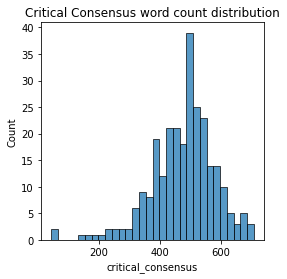

In [13]:
# Word count distribution for critical consensus
rev_len = df_merge['critical_consensus'].apply(lambda x: len(', '.join(x)))
plt.figure(figsize=(4,4))
sns.histplot(rev_len, bins=30)
plt.title('Critical Consensus word count distribution')

### Reducing the Genres

In [14]:
# Change genre from a string to a list
df_merge["genre"] = df_merge["genre"].apply(lambda x: x.split(' , '))

# Isolate genres into individual items in a list
a = df_merge["genre"]
b = []
for i in a:
    for j in i:
        b.append(j)

# Summarise genres in data table
b_df = pd.DataFrame(b, columns=['Genres'])
b_df = (b_df.value_counts() / len(b_df) * 100).reset_index()
b_df.columns = ['Genres', 'Percentage']
b_df.style.bar()

,Genres,Percentage
0,Adventure,18.993711
1,Action,14.088050
2,Fantasy,13.459119
3,Comedy,11.698113
4,Kids & Family,8.553459
5,Sci-Fi,7.798742
6,Animation,5.283019
7,Mystery & Thriller,4.779874
8,Drama,4.779874
9,Horror,3.144654


In [15]:
# Dictionary to update genres
dict_genres = {'Adventure': 'Adventure',
               'Action': 'Action',
               'Fantasy': 'Fantasy',
               'Comedy': 'Comedy',
               'Sci-Fi': 'Sci-Fi',
               'Kids & Family': 'Kids, Family & Animation',
               'Animation': 'Kids, Family & Animation',
               'Mystery & Thriller': 'Mystery, Thriller & Horror',
               'Drama': 'Drama & Romance',
               'Horror': 'Mystery, Thriller & Horror',
               'Romance': 'Drama & Romance',
               'Musical': 'Drama & Romance',
               'Biography': '',
               'History': '',
               'Crime': 'Mystery, Thriller & Horror',
               'Sports & Fitness': '',
               'Other': '',
               'Anime': 'Kids, Family & Animation',
               'LGBTQ+': 'Drama & Romance',
               'Music': 'Drama & Romance'}

# Update genre names per dictionary mapping
df_merge["genre"] = df_merge["genre"].apply(lambda x: [*map(dict_genres.get, x)])
df_merge["genre"] = df_merge["genre"].apply(lambda x: [a for a in x if a])


In [17]:
# Isolate genres into individual items in a list
a = df_merge["genre"]
b = []
for i in a:
    for j in i:
        b.append(j)

# Summarise genres in data table
b_df = pd.DataFrame(b, columns=['Genres'])
b_df = (b_df.value_counts() / len(b_df) * 100).reset_index()
b_df.columns = ['Genres', 'Percentage']
b_df.style.bar()

,Genres,Percentage
0,Adventure,19.842313
1,Action,14.717477
2,"Kids, Family & Animation",14.717477
3,Fantasy,14.060447
4,Comedy,12.220762
5,"Mystery, Thriller & Horror",8.672799
6,Sci-Fi,8.147175
7,Drama & Romance,7.621551


In [18]:
# Save dataframe to CSV
df_merge.to_csv('bk_data_merged.csv', index=False)

# Create a Pickle backup to preserve DataFrame structure
outfile = open('bk_data_merged','wb')
pickle.dump(df_merge, outfile)
outfile.close()